# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [3]:
# Import libraries
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.metrics

In [4]:
# Read in the data set
df = pd.read_csv('ames.csv')
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [5]:
# Clean and pre-process the data if neccessary
# Check for missing values
df.isnull().sum()

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

No data missing from the data set.

In [6]:
# Drop all data apart from Gr_Liv_Area, Garage_Area and Sale_Price
df = df.loc[:, ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]
np.shape(df)

(2930, 3)

In [7]:
df.describe()

,Gr_Liv_Area,Garage_Area,Sale_Price
count,2930.000000,2930.000000,2930.000000
mean,1499.690444,472.658362,180796.060068
std,505.508887,215.187196,79886.692357
min,334.000000,0.000000,12789.000000
25%,1126.000000,320.000000,129500.000000
50%,1442.000000,480.000000,160000.000000
75%,1742.750000,576.000000,213500.000000
max,5642.000000,1488.000000,755000.000000


Data above suggests some outliers. Plot histograms to decide how to calculate outliers depending on distribution of data points.

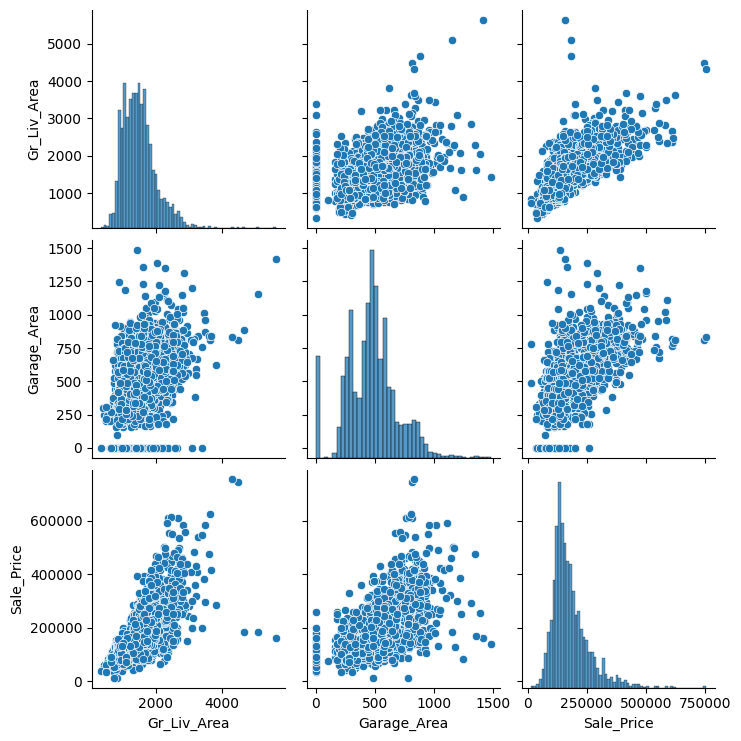

In [8]:
# Create a pairplot of data to visualise
sns.pairplot(data=df)

Data does not appear normally distributed for any of these variables so will use IQR method to find outliers.

In [9]:
# Define a function to find outliers for a given variable
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)      # Find the lower quartile value
    q3 = df.quantile(0.75)      # Find the upper quartile value
    IQR = q3 - q1               # Find the interquartile range
    outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]    # Define outliers as  more than 1.5 times the IQR below/above the quartiles 
    print("Q1: " + str(q1))
    print("Q3: " + str(q3))
    return outliers


In [10]:
# Outliers from the Gr_Liv_Area data
outliers = find_outliers_IQR(df['Gr_Liv_Area'])
print("number of outliers: " + str(len(outliers)))
print("max outlier: " + str(outliers.max()))
print("min outlier: " + str(outliers.min()))

Q1: 1126.0
Q3: 1742.75
number of outliers: 75
max outlier: 5642
min outlier: 2668


In [11]:
# Outliers from the Garage_Area data
outliers = find_outliers_IQR(df['Garage_Area'])
print("number of outliers: " + str(len(outliers)))
print("max outlier: " + str(outliers.max()))
print("min outlier: " + str(outliers.min()))

Q1: 320.0
Q3: 576.0
number of outliers: 42
max outlier: 1488
min outlier: 962


In [12]:
# Outliers from the Sale_Price data
outliers = find_outliers_IQR(df['Sale_Price'])
print("number of outliers: " + str(len(outliers)))
print("max outlier: " + str(outliers.max()))
print("min outlier: " + str(outliers.min()))

Q1: 129500.0
Q3: 213500.0
number of outliers: 137
max outlier: 755000
min outlier: 339750


There are a number of outliers within the data set, all at the top end of the data. Given that there are a relatively small number of outliers overall, and I am unsure whether these outliers are errors or true data, I will choose to drop these outliers to minimise their effect on the model.

In [13]:
# Define a function to drop outliers for a given variable
def drop_outliers_IQR(df):
    q1 = df.quantile(0.25)      
    q3 = df.quantile(0.75)      
    IQR = q3 - q1               
    not_outliers = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]   # Assingn outliers the value na 
    outliers_dropped = not_outliers.dropna().reset_index()      # Drop any na values from the data and reset the index values   
    return outliers_dropped

In [14]:
# Drop outliers from data set
df_drop = drop_outliers_IQR(df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']])
df_drop = df_drop.drop(['index'], axis=1)
print(np.shape(df_drop))
df_drop.head()

(2738, 3)


,Gr_Liv_Area,Garage_Area,Sale_Price
0,1656.0,528.0,215000.0
1,896.0,730.0,105000.0
2,1329.0,312.0,172000.0
3,2110.0,522.0,244000.0
4,1629.0,482.0,189900.0


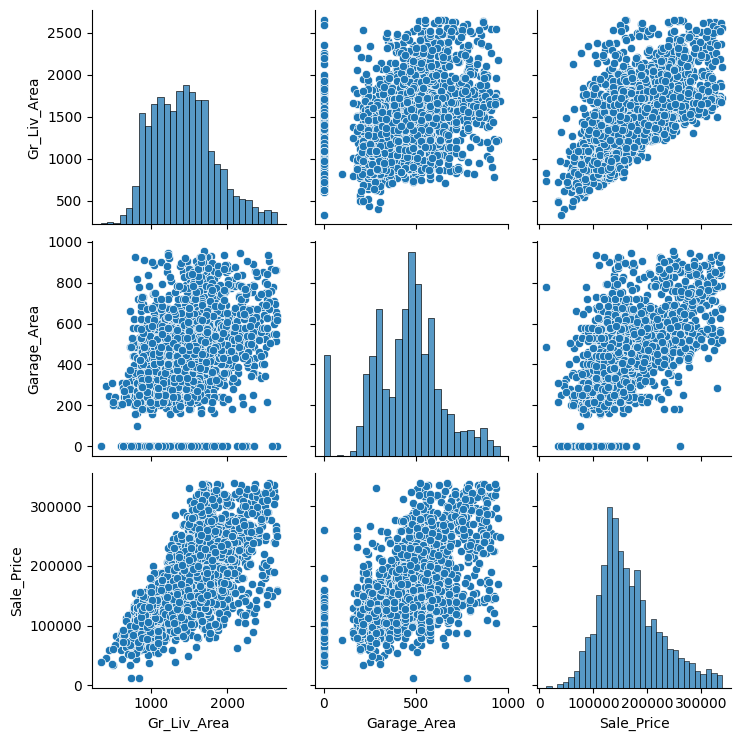

In [15]:
# Create another pairplot to visualise the cleaned data set
sns.pairplot(data=df_drop)

Having cleaned the data set Sale_Price appears approximately normally distributed, so I will standardise this and normalise Gr_Floor_Area and Garage_Area. There is a positive correlation between both Gr_Liv_Area and Garage_Area when compared to Sale_Price. Visually from the scatter plots above it appears that there is a stronger correlation between Gr_Liv_Area and Sale_Price than Garage_Area and Sale_Price.

In [16]:
# Create a simple linear regression model to compare variables individually
x = df_drop.loc[:, 'Gr_Liv_Area'].values    # Assign Gr_Liv_Area as independent variable x
y = df_drop.loc[:, 'Sale_Price'].values     # Assign Sale_Price as dependent variable y

# Reshape data as 2D array
y=y.reshape(-1, 1)      
x=x.reshape(-1, 1)

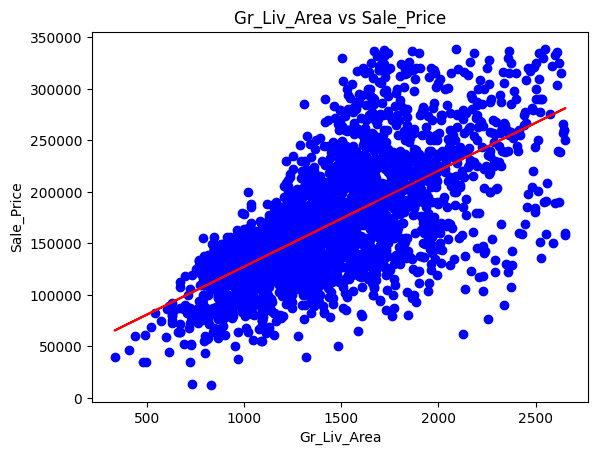

In [17]:
# Create an empty linear regression model 
liv_model = LinearRegression()

# Create the model using fit(x,y)
liv_model.fit(x,y)

# Use model to make a prediction
y_pred = liv_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,liv_model.predict(x),color = 'r')
plt.title('Gr_Liv_Area vs Sale_Price')
plt.xlabel('Gr_Liv_Area')
plt.ylabel('Sale_Price')
plt.show()

In [43]:
# Find the coefficient of the model and print
liv_coef = liv_model.coef_
liv_corr = df_drop['Gr_Liv_Area'].corr(df['Sale_Price'])
print("The coefficient of this model is: ", liv_coef[0], "The correlation coefficient is: ", liv_corr)

The coefficient of this model is:  [93.07581529] The correlation coefficient is:  0.0036662886499540036


Here we can see that the simple linear regression model suggests that for an increase in ground floor living area of 100 sq feet we would expect a sale price increase of around $9300. We can also more clearly see that whilst there is a positive correlation this is stronger in the lower ranges of the x values, those values above 1500 sq feet become ever more variable. As such we have found only a correlation coefficient value slightly above 0.

In [19]:
# Create a second simple linear regression model for Garage_Area 
x = df_drop.loc[:, 'Garage_Area'].values
y = df_drop.loc[:, 'Sale_Price'].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

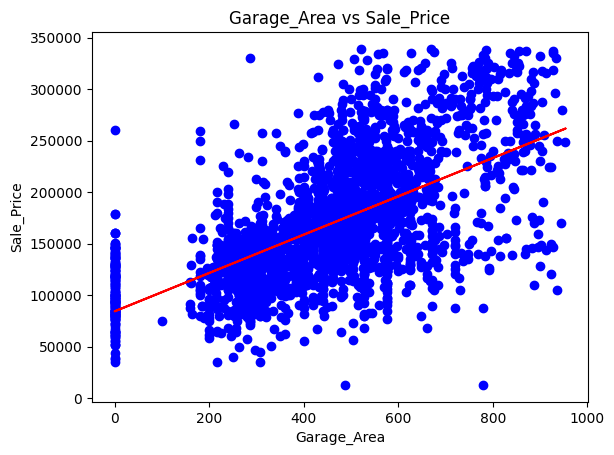

In [20]:
# Create an empty linear regression model 
garage_model = LinearRegression()

# Create the model using fit(x,y)
garage_model.fit(x,y)

# Use model to make a prediction
y_pred = garage_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,garage_model.predict(x),color = 'r')
plt.title('Garage_Area vs Sale_Price')
plt.xlabel('Garage_Area')
plt.ylabel('Sale_Price')
plt.show()

In [44]:
# Find the coefficient of the model and print
garage_coef = garage_model.coef_
garage_corr = df_drop['Garage_Area'].corr(df['Sale_Price'])
print("The coefficient of this model is: ", garage_coef[0], "The correlation coefficient is: ", garage_corr)

The coefficient of this model is:  [185.98012205] The correlation coefficient is:  0.022421298189961032


Here the coefficient of the garage area model is approx 186 meaning that we might expect for an increase in garage area of 10 sq feet the sale price will increase by around $1860. What is slightly surprising is that here the correlation coefficient is slightly higher than the previous data set, but still close enough to zero to actually be negligible.

In [21]:
# Split the independent variables from the dependent variable
# Assign Gr_Liv_Area and Garage_Area as independent variables to x and Sale_Price as dependent variable y
x = df_drop.loc[:, ['Gr_Liv_Area', 'Garage_Area']].values
y = df_drop.loc[:, ['Sale_Price']].values

In [22]:
# Reshape the data into a 2D array
y = y.reshape(-1, 1)
x = x.reshape(-1, x.shape[1])

In [23]:
# Create a training and test set with a 75:25 split ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True)

In [24]:
# Fit the MinMaxScaler on the x training set
minmax_scale = preprocessing.MinMaxScaler().fit(x_train)

# Fit the StandardScaler on the y training set
std_scale = preprocessing.StandardScaler().fit(y_train)

# Apply the scalers to train and test data
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)
y_train = std_scale.transform(y_train)
y_test = std_scale.transform(y_test)

In [25]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Create the linear regression model for the data and predicted data from test set
model = LinearRegression()
model = model.fit(x_train,y_train)

# Create line coordinates
x_line = np.empty(x_test.shape)         # Create an empty array with same dimensions as test set
for i in range(x_test.shape[1]):        # Loop through all values and populate the array 
    x_line[:, i] = np.linspace(np.min(x_test[:,i]), np.max(x_test[:,i]), num=x_test.shape[0])
y_line = model.predict(x_line)     # Predict corresponding y values for those in the previous array

In [26]:
# Print the model intercept and coefficients
print('Intercept: \n', model.intercept_)   
print('Coefficients: \n', model.coef_)

Intercept: 
 [-2.29840953]
Coefficients: 
 [[2.7512805  2.14053532]]


In [27]:
# Generate predictions for the test set
predictions = model.predict(x_test)
predictions[0:5]

array([[-0.04898813],
       [-1.05465805],
       [-0.33916048],
       [ 0.93164991],
       [-0.00230875]])

In [28]:
# Find the MSE and RMSE for the model
mse = sklearn.metrics.mean_squared_error(y_test,predictions)
rmse  = np.sqrt(mse)
print("Mean Square Error: ", mse.round(4), "Root Mean Square Error: ", rmse.round(4))

Mean Square Error:  0.407 Root Mean Square Error:  0.6379


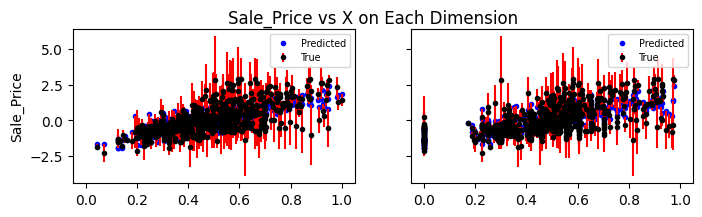

In [29]:
# Create a figure to contain a multiple plot of scatter diagrams 
fig, ax = plt.subplots(1, x_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Sale_Price vs X on Each Dimension")
ax[0].set_ylabel(df.columns[2])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(x_test.shape[1]):
    ax[i].errorbar(x_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(x_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

**Interpret coefficients in the context of the prediction:**
As previously discussed, based on scatter plots of Gr_Liv_Area and Garage_Area vs Sale_Price it appeared there was a stronger correlation between the area of the ground floor living space than that of the garage and the sale price of the property, however later investigation found the reverse to be true but more significantly that there was very little correlation between one single variable and the sale price. The coefficients of the multiple regression model are both significantly positive, showing that an increase in either variable will result in an increase in sale price, but the coefficient for for Gr_Liv_Area is significantly higher at around 2.8 compared to 2.0. 

When we look at the values for the MSE and RMSE we can see that there is a fairly significant error between our predictions from the model and our true data. The value of the RMSE is easiest to consider as it shows an average error value of approx 0.6. Given that the data has been standardised we have a known standard deviation of 1, we can see that our RMSE is somewhat lower than the SD but not significantly enough for us to claim that our model accounts for a majority factors that may affect sale price and give an accurate prediciton. We can see a visual representation of this on the error plot above where our red error bars extend significantly above and below the body of our data set, suggesting that we are at times working with predictions that could even be outside of the range of our observations.


**Summarise findings:**
In summary, our model predicting sale price using the two metrics of area of the ground floor living area and garage area, gives a reasonable result, showing that these two variables are among the most significant in our data set, but the model could be substantially improved by including other variables such as number of bedrooms or bathrooms. There is a relatively significant average error in the model, showing that there are other factors at work that would improve or inhibit a property's sale price apart from the two considered in our model. If these were added into our muliple linear regression model I would expect the RMSE to decrease, showing an improvement in the accuracy of the model.